# Run FindAllMarkers on Set 3

In [1]:
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)
library(MAST)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
 

In [2]:
seu_HQC <- readRDS(file = "../../data/seurat_object/Set3/seu_HQC_subclusterd2_Set3.obj")
seu_HQC

An object of class Seurat 
28745 features across 6118 samples within 2 assays 
Active assay: SCT (11239 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, reumap

In [3]:
levels <- read.table(file="./manual_ID_list/manual_ID_levels_color.txt",comment.char = "")
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)

[1] "ectoderm_head_croc"       "ectoderm_head_Optix_Six4"
[3] "ectoderm_head_Optix_sog"  "ectoderm_head_oc_so"     
[5] "ectoderm_head_oc_Doc2"    "ectoderm_head_oc_CenG1A"

[1] 77

[1] "lightsteelblue1" "lightsteelblue2" "lightsteelblue3" "lightskyblue1"  
[5] "lightskyblue2"   "lightskyblue3"

In [4]:
annot_df <- read.csv('./annot_df.csv')
annot_df

X  cluster_id cluster_name                          
1   1  1         endoderm_antMG_wntD                   
2   2  2         mesoderm_head                         
3   3  3         endoderm_antMG_wg                     
4   4  4         ectoderm_intermediate_NE_PS1          
5   5  5         ectoderm_medial_NE_PS1                
6   6  6         ectoderm_medial_DE_PS1                
7   7  7         ectoderm_lateral_DE_PS1               
8   8  8         ectoderm_lateral_NE_PS1               
9   9  9         amnioserosa_PS2                       
10 10 10         ectoderm_head_Optix_Six4              
11 11 11         ectoderm_head_oc_Oaz                  
12 12 12         ectoderm_head_oc_Doc2                 
13 13 13         ectoderm_intermediate_NE_PS0          
14 14 14         ectoderm_head_oc_CenG1A               
15 15 15         ectoderm_medial_NE_PS0                
16 16 16         ectoderm_head_kn_lateral              
17 17 17         ectoderm_head_croc                    
18 18 18         ectoderm_head_oc_Pvf3_lateral         
19 19 19         ectoderm_DE_PS0                       
20 20 20         amnioserosa_PS3                       
21 21 21         ectoderm_head_oc_so                   
22 22 22         ectoderm_head_oc_Pvf3_medial          
23 23 23         amnioserosa_PS1                       
24 24 24         ectoderm_lateral_NE_PS0               
25 25 25         ectoderm_head_kn_medial               
26 26 26         ectoderm_head_Optix_sog               
27 27 27         ectoderm_medial_DE_abdominal_even     
28 28 28         ectoderm_medial_NE_abdominal_even     
29 29 29         amnioserosa_trunk                     
30 30 30         ectoderm_medial_NE_abdominal_odd      
⋮  ⋮  ⋮          ⋮                                     
48 48 48         ectoderm_lateral_DE_PS2               
49 49 49         ectoderm_intermediate_NE_PS13         
50 50 50         ectoderm_intermediate_DE_PS13         
51 51 51         ectoderm_medial_DE_PS2                
52 52 52         mesoderm_PS1_Dfd                      
53 53 53         mesoderm_PS2_ken                      
54 54 54         mesoderm_gcm_Dfd                      
55 55 55         mesoderm_gcm                          
56 56 56         mesoderm_PS6                          
57 57 57         mesoderm_PS4                          
58 58 58         mesoderm_abdominal_odd                
59 59 59         mesoderm_abdominal_even               
60 60 60         mesoderm_PS3                          
61 61 61         mesoderm_PS5                          
62 62 62         mesoderm_PS13                         
63 63 63         mesoderm_PS14                         
64 64 64         mesoderm_caudal_visceral              
65 65 65         mesoderm_PS14/mesoderm_caudal_visceral
66 66 66         midline_cells_even                    
67 67 67         midline_cells_odd                     
68 68 68         pole_cells                            
69 69 69         endoderm_postMG_ventral               
70 70 70         ectoderm_hindgut_ventral              
71 71 71         endoderm_postMG_lateral               
72 72 72         ectoderm_PS14_dorsal                  
73 73 73         ectoderm_PS14/hindgut                 
74 74 74         ectoderm_hindgut_dorsal               
75 75 75         endoderm_postMG_dorsal                
76 76 76         ectoderm_PS14_ventral                 
77 77 77         amnioserosa_PS14

In [5]:
unique(seu_HQC$manual_ID_num)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52" "53" "54" "55" "56" "57" "58" "59" "60"
[61] "61" "62" "63" "64" "65" "66" "67" "68" "69" "70" "71" "72" "73" "74" "75"
[76] "76" "77"

In [6]:
all.markers <- FindAllMarkers(seu_HQC, method = 'MAST')
head(all.markers)

Calculating cluster ectoderm_head_croc

Calculating cluster ectoderm_head_Optix_Six4

Calculating cluster ectoderm_head_Optix_sog

Calculating cluster ectoderm_head_oc_so

Calculating cluster ectoderm_head_oc_Doc2

Calculating cluster ectoderm_head_oc_CenG1A

Calculating cluster ectoderm_head_oc_Oaz

Calculating cluster ectoderm_head_oc_Pvf3_medial

Calculating cluster ectoderm_head_oc_Pvf3_lateral

Calculating cluster ectoderm_head_kn_lateral

Calculating cluster ectoderm_head_kn_medial

Calculating cluster ectoderm_DE_PS0

Calculating cluster ectoderm_lateral_NE_PS0

Calculating cluster ectoderm_intermediate_NE_PS0

Calculating cluster ectoderm_medial_NE_PS0

Calculating cluster ectoderm_medial_DE_PS1

Calculating cluster ectoderm_lateral_DE_PS1

Calculating cluster ectoderm_lateral_NE_PS1

Calculating cluster ectoderm_intermediate_NE_PS1

Calculating cluster ectoderm_medial_NE_PS1

Calculating cluster ectoderm_medial_DE_PS2

Calculating cluster ectoderm_intermediate_DE_PS2

Calculat

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster           
fd102C   1.312304e-273 1.6732600 0.938 0.018 1.474899e-269 ectoderm_head_croc
CG10553  8.019102e-235 0.6802501 0.625 0.008 9.012669e-231 ectoderm_head_croc
croc     2.267672e-175 2.2905349 0.969 0.033 2.548637e-171 ectoderm_head_croc
PGRP-SC2 6.329215e-158 1.1897058 0.938 0.034 7.113404e-154 ectoderm_head_croc
Adgf-A   2.235872e-128 1.0707043 0.906 0.039 2.512897e-124 ectoderm_head_croc
Optix    1.990920e-107 2.5929413 0.938 0.053 2.237595e-103 ectoderm_head_croc
         gene    
fd102C   fd102C  
CG10553  CG10553 
croc     croc    
PGRP-SC2 PGRP-SC2
Adgf-A   Adgf-A  
Optix    Optix

In [7]:
head(all.markers)

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster           
fd102C   1.312304e-273 1.6732600 0.938 0.018 1.474899e-269 ectoderm_head_croc
CG10553  8.019102e-235 0.6802501 0.625 0.008 9.012669e-231 ectoderm_head_croc
croc     2.267672e-175 2.2905349 0.969 0.033 2.548637e-171 ectoderm_head_croc
PGRP-SC2 6.329215e-158 1.1897058 0.938 0.034 7.113404e-154 ectoderm_head_croc
Adgf-A   2.235872e-128 1.0707043 0.906 0.039 2.512897e-124 ectoderm_head_croc
Optix    1.990920e-107 2.5929413 0.938 0.053 2.237595e-103 ectoderm_head_croc
         gene    
fd102C   fd102C  
CG10553  CG10553 
croc     croc    
PGRP-SC2 PGRP-SC2
Adgf-A   Adgf-A  
Optix    Optix

In [8]:
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

[1] 770

NULL

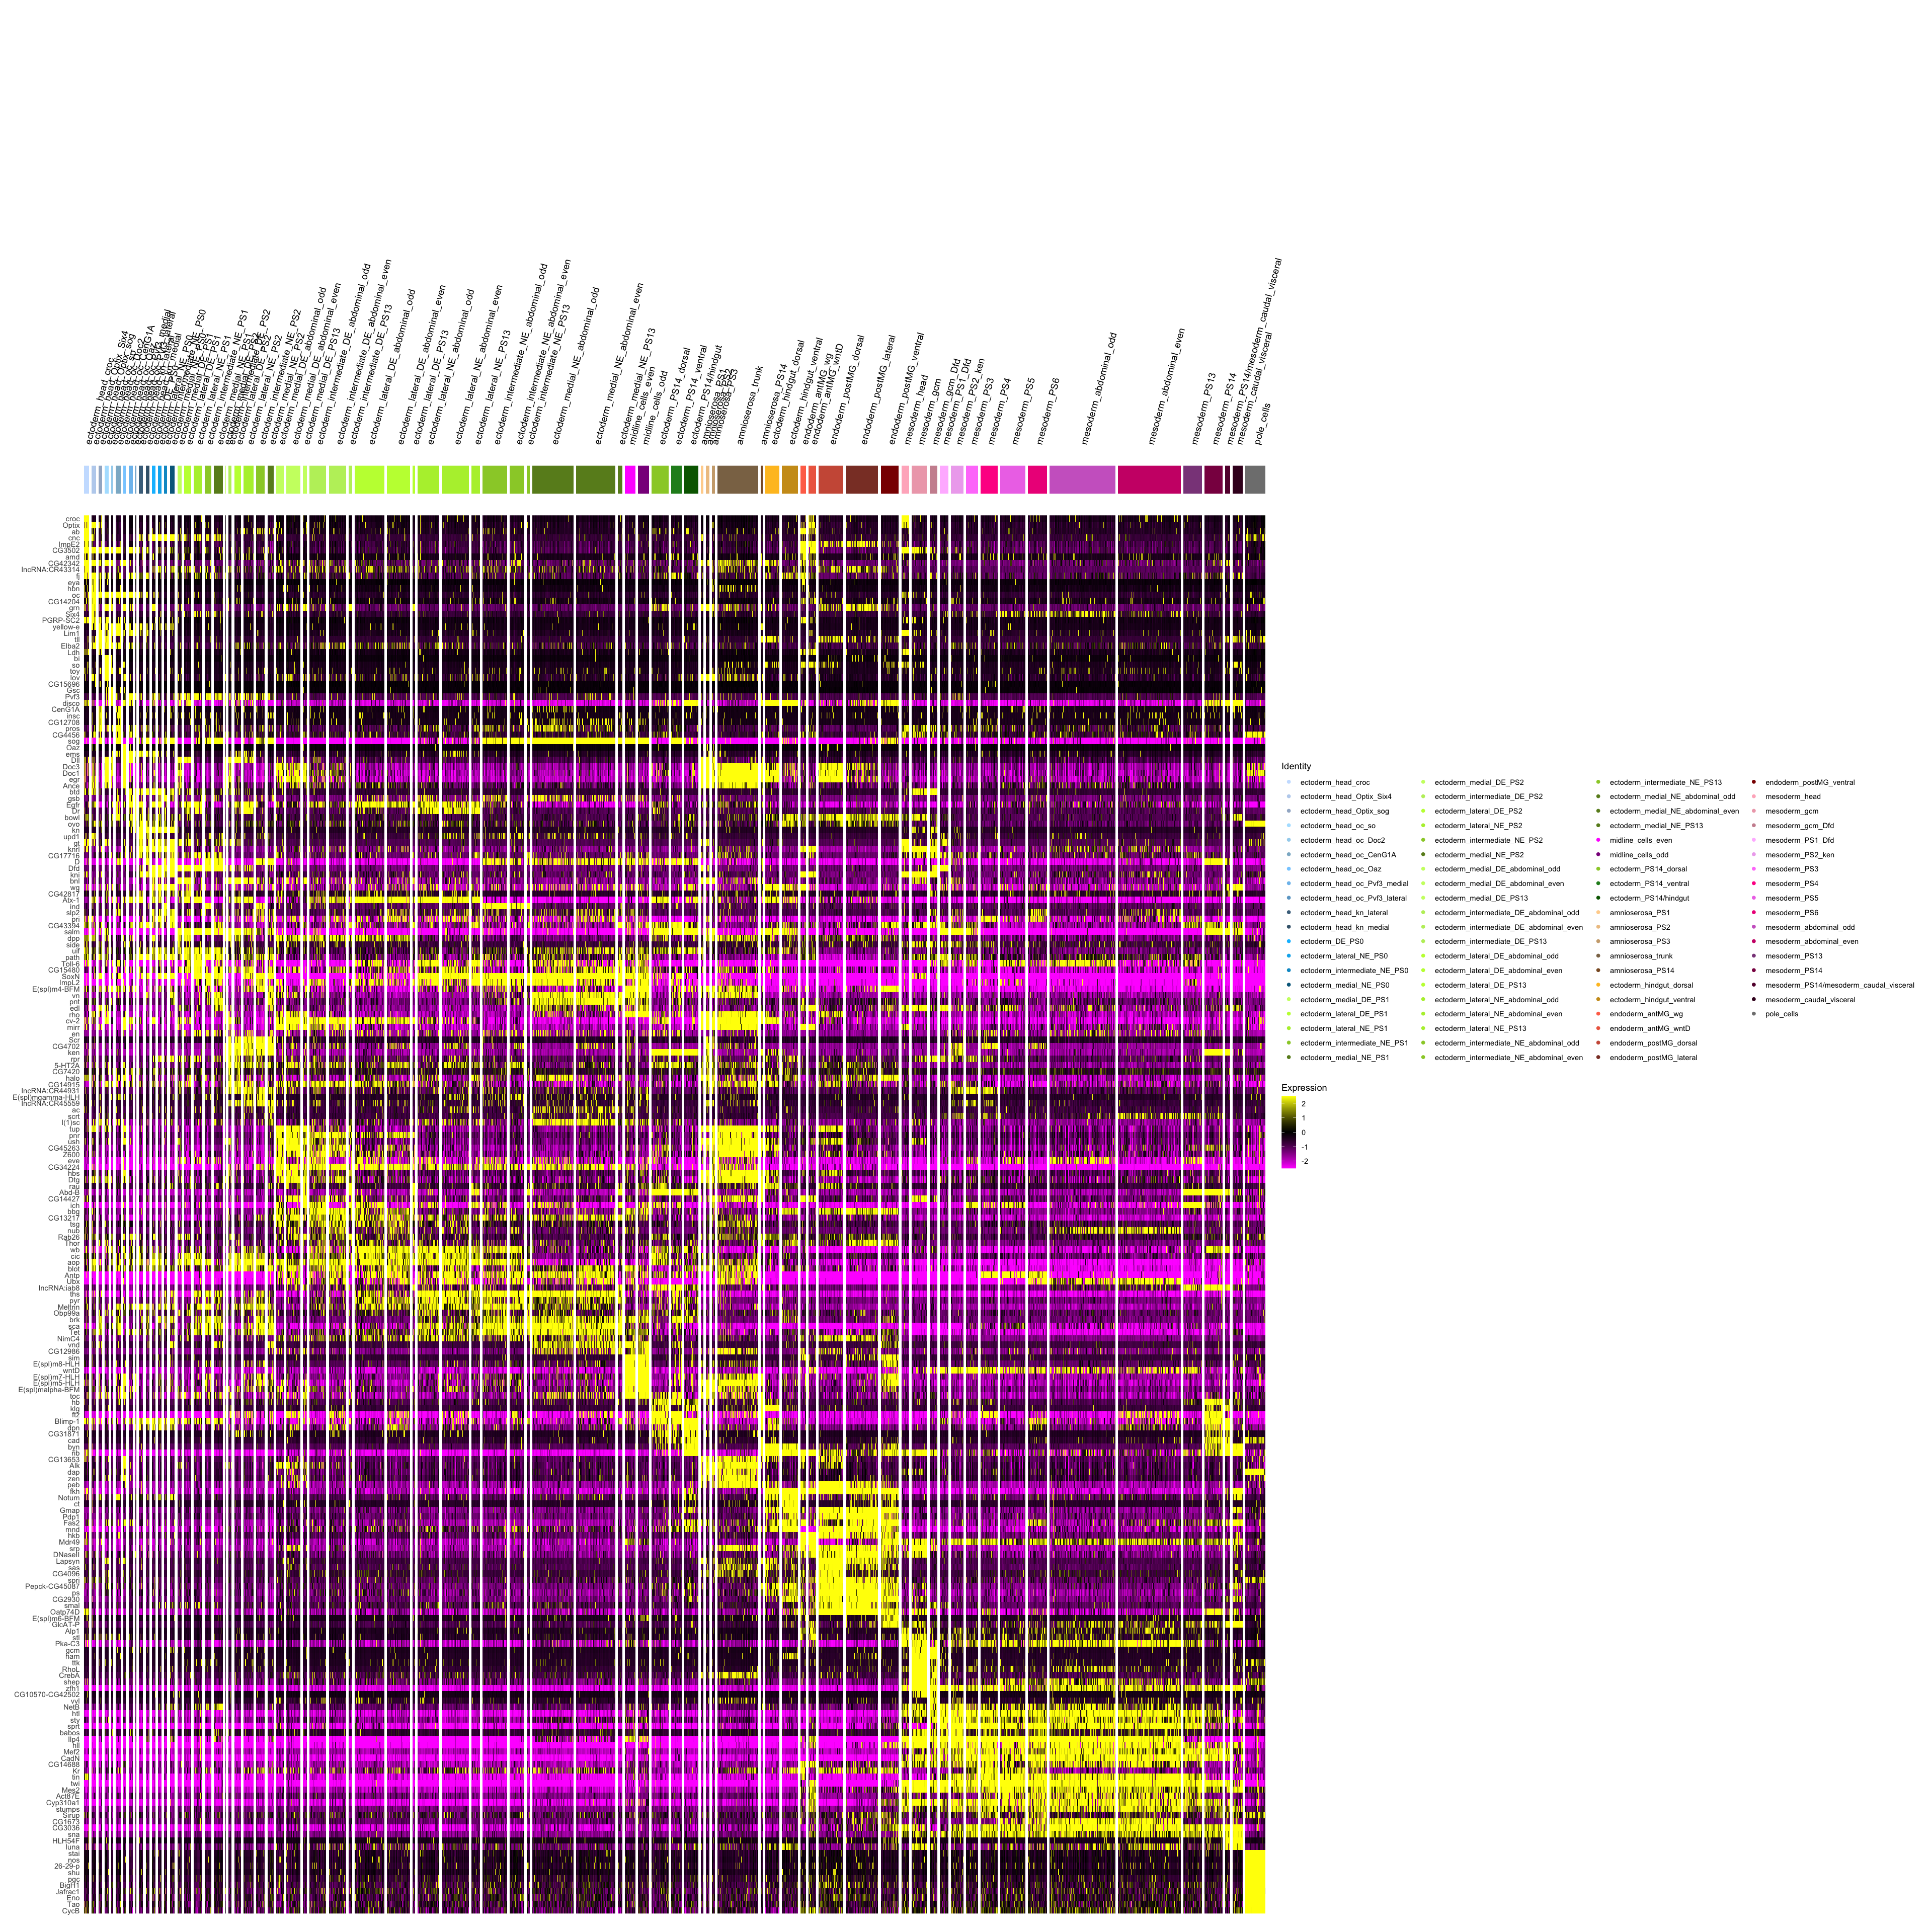

In [9]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors,
          angle = 75, size=4)
ggsave(file = "./figures/09_FindAllMarkers_Set3/All_cells_heatmap_manual_ID_with_legend.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

NULL

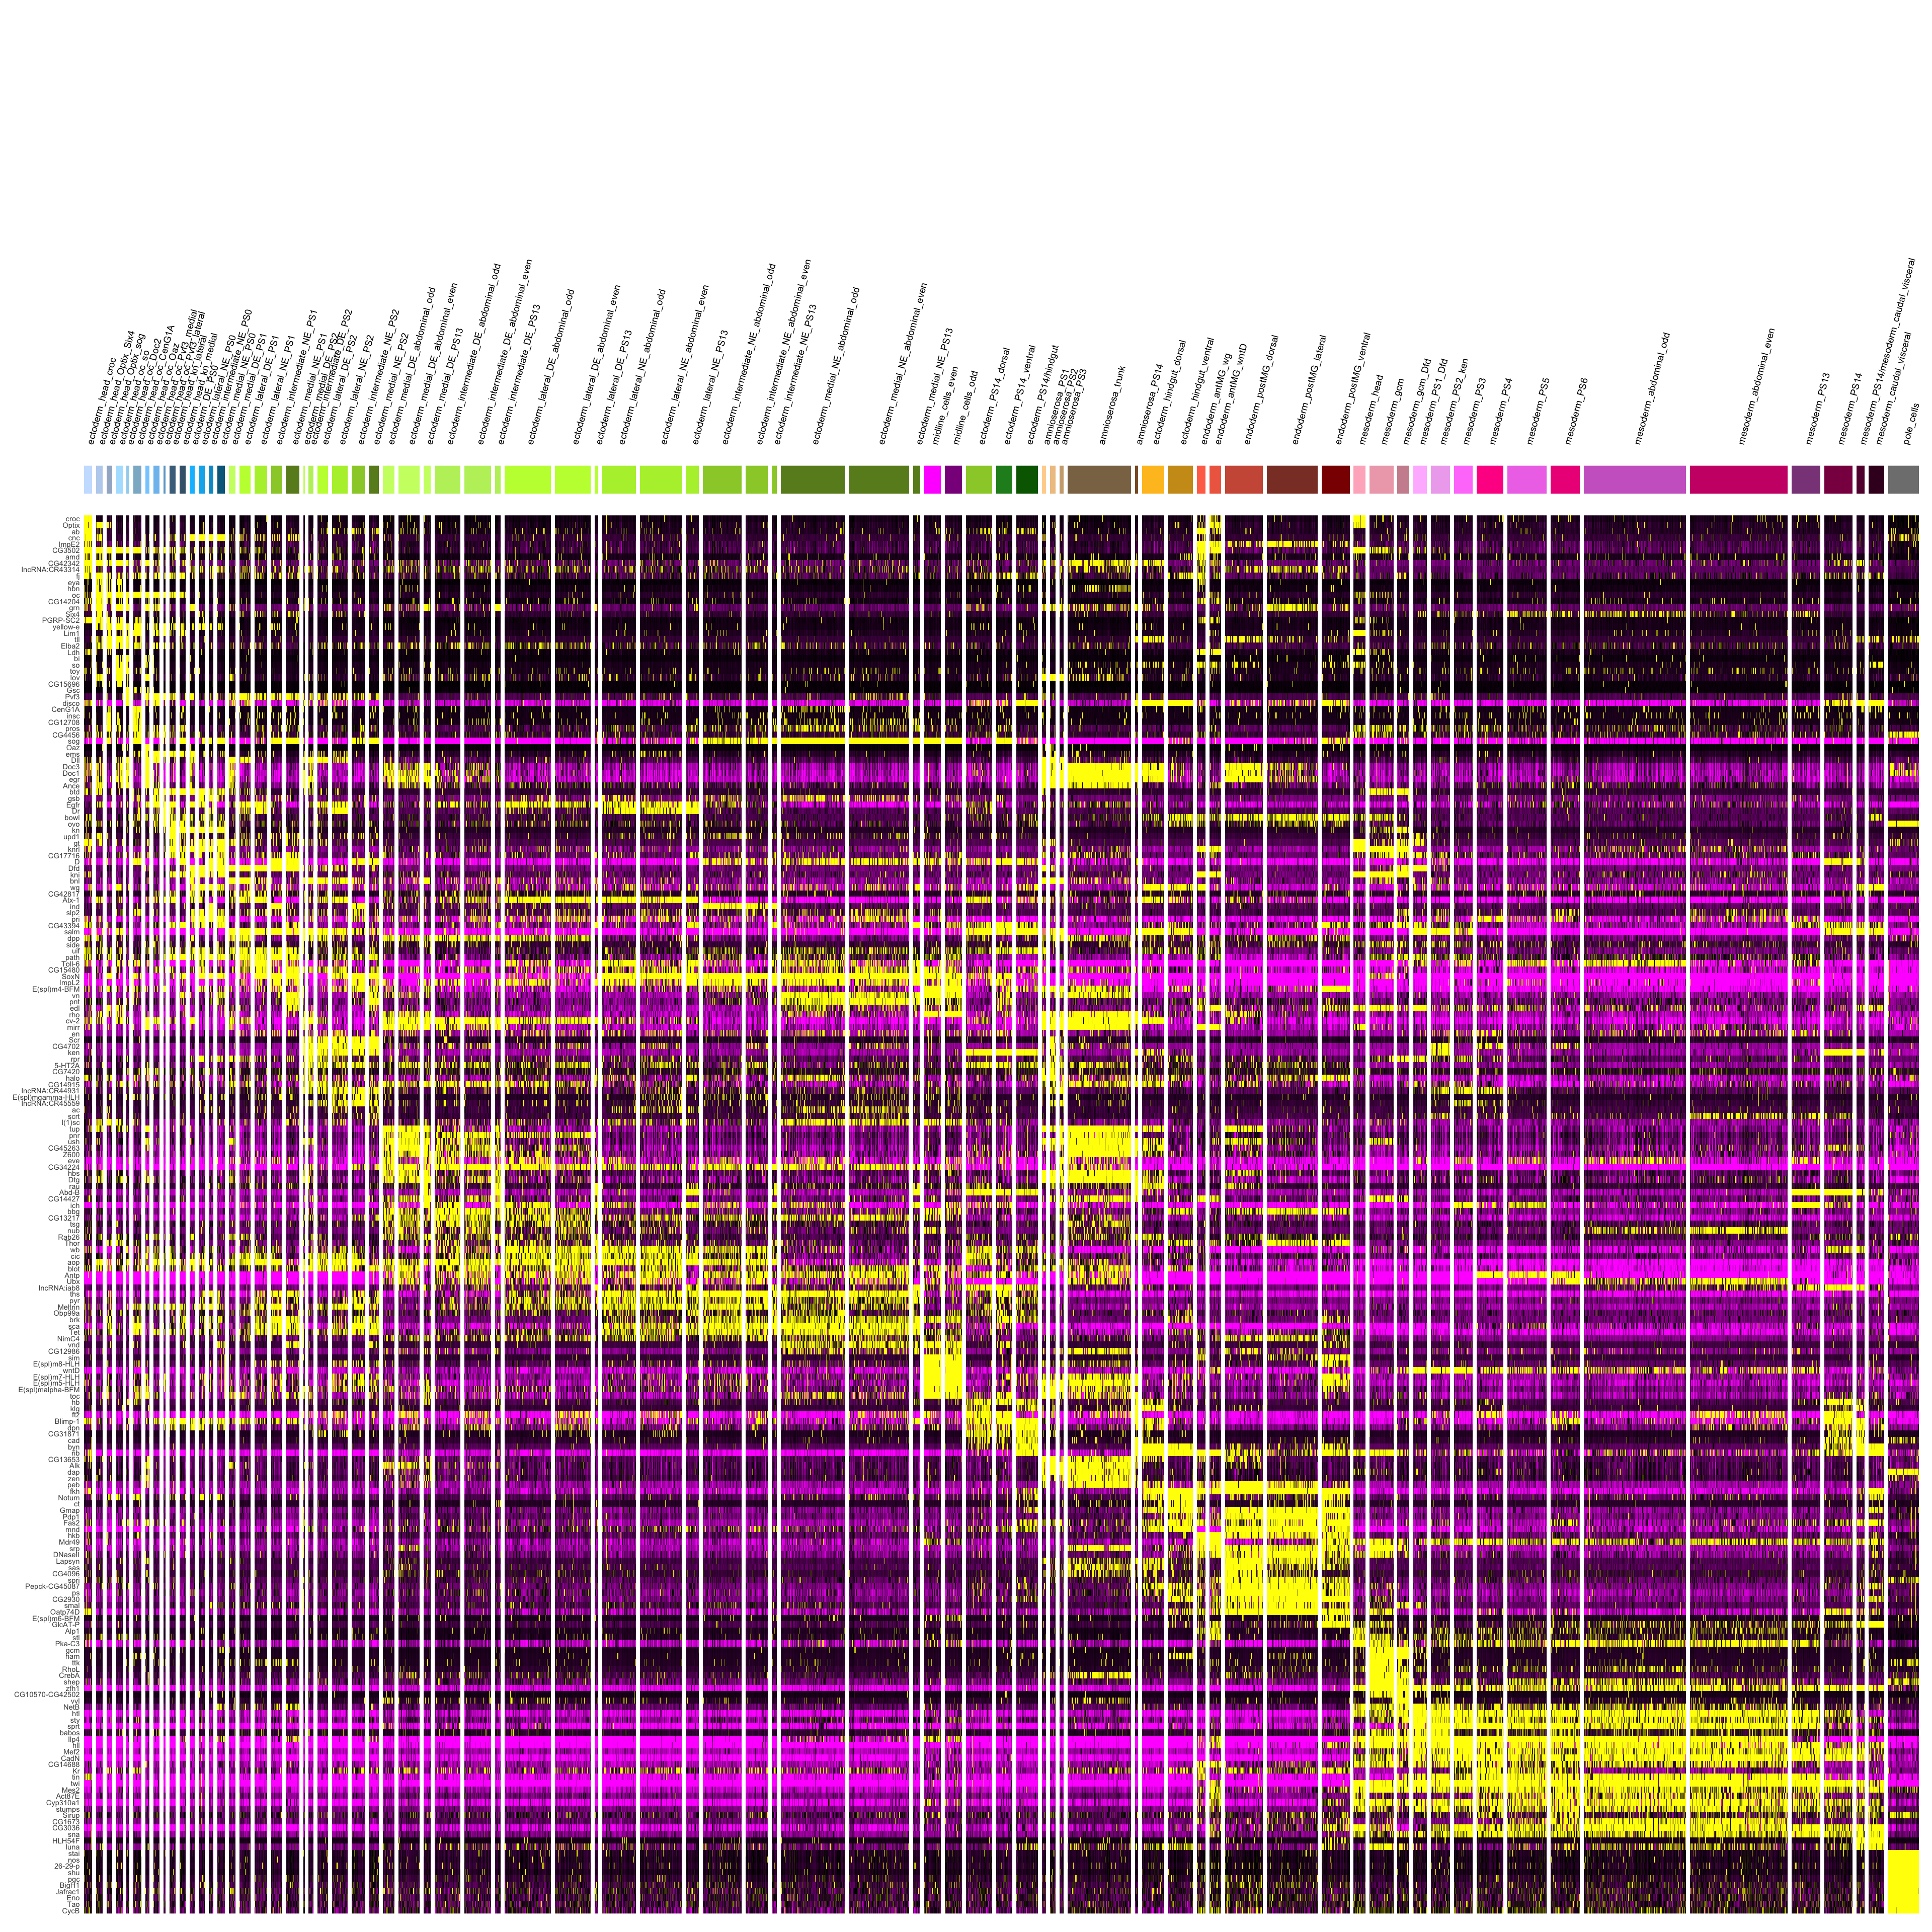

In [10]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors,
          angle = 75, size=4) + NoLegend()
ggsave(file = "./figures/09_FindAllMarkers_Set3/All_cells_heatmap_manual_ID.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

In [11]:
manual_ID <- all.markers$cluster
unique.manual_ID <- unique(manual_ID)
manual_ID_num <- copy(manual_ID)
i <- 1
for (name in unique.manual_ID){
    rname <- paste('^',name, sep = '')
    rname <- paste(rname, '$', sep = '')
    manual_ID_num <- gsub(manual_ID_num, pattern = rname, replacement = i)
    i <- i + 1
}
all.markers$cluster_num <- manual_ID_num

In [12]:
write.csv(x = all.markers, file = './all_markers_Set3.csv')

In [13]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] MAST_1.16.0                 SingleCellExperiment_1.12.0
 [3] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [5] GenomicRanges_1.42.0        GenomeInfoDb_1.26.2        
 [7] IRanges_2.24.1              S4Vectors_0.28.1           
 [9] BiocGenerics_0.36.0         MatrixGenerics_1.2.0       
[11] matrixStats_0.57.0          tibble_3.0.5               
[13] dplyr_1.0.3                 Matrix_1.3-2               
[15] data.table_1.13.6           magrittr_2.0.1